# Modelo de Regressão - Precificação de imóveis

Os modelos de precificação são essenciais para as empresas maximizarem lucros, permanecerem competitivas, segmentarem o mercado, tomarem decisões estratégicas, gerenciarem estoques, construírem a marca e preverem receitas. Eles ajudam a determinar os preços ideais com base na demanda, concorrência e percepção do cliente. Em resumo, os modelos de precificação são fundamentais para o sucesso e a sustentabilidade das empresas.  Para esse projeto, vou utilizar o dataset *House Prices - Advanced Regression Techniques*, do Kaggle.

## House Prices - Advanced Regression Techniques
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

O conjunto de dados "House Prices: Advanced Regression Techniques" do Kaggle contém informações sobre casas em Ames, Iowa, EUA, usado em competições de ciência de dados. Ele visa prever preços de casas com base em atributos como tamanho do lote, área construída, número de quartos e qualidade do acabamento.

### Importando Bibliotecas

In [1]:
# Bibliotecas de manipulação
import pandas as pd
import numpy as np

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de pré-processamento
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Bibliotecas de modelagem
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Bibliotecas métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Carregando Datasets

In [2]:
# Importando e visualizando dataset de treino
url_train = r'https://raw.githubusercontent.com/MARINHOALEX/Modelo-de-precificacao---House-Prices/main/train.csv'

train = pd.read_csv(url_train)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Importando dataset de teste
url_test = r'https://raw.githubusercontent.com/MARINHOALEX/Modelo-de-precificacao---House-Prices/main/test.csv'

test = pd.read_csv(url_test)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
# Importando dataset de validação
url_submission = r'https://raw.githubusercontent.com/MARINHOALEX/Modelo-de-precificacao---House-Prices/main/sample_submission.csv'

submission = pd.read_csv(url_submission)
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


## Analise e Pré-Processamento de dados

Como os dataset são muito extensos, vou concatena-los para aplicar as açoes de uma só vez.  Também já vou aplicando o pré-processamento conforme necessidade.

In [5]:
# Criando colunas de treino e test para diferenciar datasets
train['Train_test'] = 0
test['Train_test'] = 1

# Concatenando datasets
df = pd.concat([train, test])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train_test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,1
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,1
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,1
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,1


In [6]:
# Visualizando quantidade de valores nulos em cada coluna
df.isnull().sum()[df.isnull().sum()>1].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
dtype: int64

In [7]:
# Visualizando colunas com mais de 10% de valores nulos
df.isnull().mean()[df.isnull().mean()>0.1].sort_values(ascending=False)

PoolQC         0.996574
MiscFeature    0.964029
Alley          0.932169
Fence          0.804385
SalePrice      0.499829
FireplaceQu    0.486468
LotFrontage    0.166495
dtype: float64

Como o dataset tem muitas colunas, e muitas com valores nulos, vou excluir as colunas com mais de 10% de valores nulos.

In [8]:
# Excluindo colunas com mais de 10% de valores nulos

# Criando variável com colunas que correspondem a query
delete_columns = df.isnull().mean()[df.isnull().mean()>0.1].sort_values(ascending=False).index

# Removendo coluna alvo da lista
delete_columns = delete_columns.drop('SalePrice')

# Excluindo colunas
df.drop(columns=delete_columns, inplace=True)

print(f'Colunas excluídas\n{delete_columns}')
display(df.head())

Colunas excluídas
Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train_test
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000.0,0


In [9]:
# Visualizando o describe do restante da colunas com valores nulos
valores_nulos = df.isnull().sum()[df.isnull().sum()>1].sort_values(ascending=False).index
df[valores_nulos].describe()

,SalePrice,GarageYrBlt,MasVnrArea,BsmtHalfBath,BsmtFullBath
count,1460.000000,2760.000000,2896.000000,2917.000000,2917.000000
mean,180921.195890,1978.113406,102.201312,0.061364,0.429894
std,79442.502883,25.574285,179.334253,0.245687,0.524736
min,34900.000000,1895.000000,0.000000,0.000000,0.000000
25%,129975.000000,1960.000000,0.000000,0.000000,0.000000
50%,163000.000000,1979.000000,0.000000,0.000000,0.000000
75%,214000.000000,2002.000000,164.000000,0.000000,1.000000
max,755000.000000,2207.000000,1600.000000,2.000000,3.000000


0.0       1738
120.0       15
200.0       13
176.0       13
216.0       12
          ... 
167.0        1
731.0        1
394.0        1
886.0        1
1159.0       1
Name: MasVnrArea, Length: 444, dtype: int64


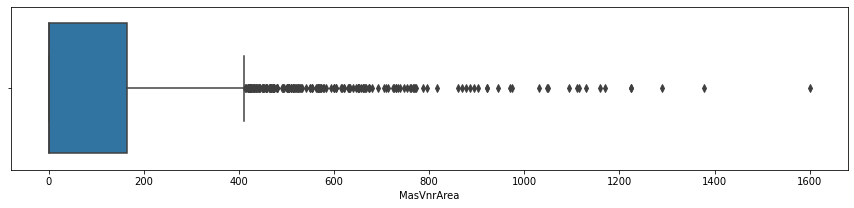

In [10]:
# Visualizando distribuição da coluna MasVnrArea
plt.figure(figsize=(15,3))
sns.boxplot(x=df['MasVnrArea'].reset_index(drop=True));
print(df.MasVnrArea.value_counts())

O restante das colunas com valores nulos será substituído por -1

In [11]:
# Substituindo valores nulos por -1
df.fillna(-1, inplace=True)

In [12]:
# Visualizando estatísticas descritivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2919.0,101.388147,178.859069,-1.0,0.0,0.0,163.5,1600.0
BsmtFinSF1,2919.0,441.271668,455.606347,-1.0,0.0,368.0,733.0,5644.0
BsmtFinSF2,2919.0,49.564919,169.179206,-1.0,0.0,0.0,0.0,1526.0


In [13]:
# Visualizando informações atualizada do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [14]:
# Analisando valores das colunas do tipo object
for i in df.columns[df.dtypes == 'object']:
    print(f'{i}: {df[i].value_counts().shape[0]}')
    print(df[i].unique())
    print('-'*50)

MSZoning: 6
['RL' 'RM' 'C (all)' 'FV' 'RH' -1]
--------------------------------------------------
Street: 2
['Pave' 'Grvl']
--------------------------------------------------
LotShape: 4
['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------
LandContour: 4
['Lvl' 'Bnk' 'Low' 'HLS']
--------------------------------------------------
Utilities: 3
['AllPub' 'NoSeWa' -1]
--------------------------------------------------
LotConfig: 5
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
--------------------------------------------------
LandSlope: 3
['Gtl' 'Mod' 'Sev']
--------------------------------------------------
Neighborhood: 25
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
--------------------------------------------------
Condition1: 9
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 

Vou aplicar o *cat.codes* nas colunas *Neighborhood, Exterior1st e Exterior2nd*, que possuem mais de dez elementos únicos e o get_dummies ao restante.

In [15]:
# Atribuindo valores numéricos á coluna Exterior2nd
df.Neighborhood = df.Neighborhood.astype('category').cat.codes
df.Exterior1st = df.Exterior1st.astype('category').cat.codes
df.Exterior2nd = df.Exterior2nd.astype('category').cat.codes

print(f'{df.Neighborhood.head()}\n')
print(f'{df.Exterior1st.head()}\n')
print(f'{df.Exterior2nd.head()}\n')

0     5
1    24
2     5
3     6
4    15
Name: Neighborhood, dtype: int8

0    13
1     9
2    13
3    14
4    13
Name: Exterior1st, dtype: int8

0    14
1     9
2    14
3    16
4    14
Name: Exterior2nd, dtype: int8



In [16]:
# Criando variáveis de 0 e 1 para o restante das colunas do tipo object utilizando get_dummies
df = pd.get_dummies(df, columns=df.columns[df.dtypes == 'object'].to_list())
display(df.head())
print(df.shape)
print(df.columns)

,Id,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,5,7,5,2003,2003,13,14,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,24,6,8,1976,1976,9,9,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,5,7,5,2001,2002,13,14,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,6,7,5,1915,1970,14,16,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,15,8,5,2000,2000,13,14,...,0,0,0,1,0,0,0,0,1,0


(2919, 235)
Index(['Id', 'MSSubClass', 'LotArea', 'Neighborhood', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=235)


## Modelagem

Utilizando modelo para remover outliers

In [17]:
# Instanciando e treinando modelo para idenficicação de outlier
clf = IsolationForest(random_state=123).fit(df)

# Identificando Outliers
outliers = clf.predict(df)

# Excluindo Outliers
print(f'Total de linhas excluidas: {df.index[outliers == -1].shape[0]}')
df.drop(index=df.index[outliers == -1], inplace=True)
print(f'Dimenssões atuais do DataFrame: {df.shape}')

Total de linhas excluidas: 57
Dimenssões atuais do DataFrame: (2805, 235)


In [18]:
# Separando o dataframe em conjunto principal e de validação com a coluna Train_test
valid = df[df.Train_test == 1].drop(columns=['SalePrice', 'Train_test'])

In [19]:
# Separando conjunto em X e y
X = df[df.Train_test == 0].drop(columns=['SalePrice', 'Train_test'])
y = df[df.Train_test == 0].SalePrice

In [20]:
# Criado conjunto com valores escalonados e com redução de dimensionalidade
X_scaler = StandardScaler().fit(X).fit_transform(X)
X_pca = PCA(n_components=0.15).fit_transform(X_scaler)
print(f'Redução de {X.shape[1] - X_pca.shape[1]} colunas')

Redução de 229 colunas


In [21]:
# Separando dataset em teino e teste
SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((982, 233), (421, 233), (982,), (421,))

In [22]:
# Separando dataset transformado em teino e teste
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=SEED)
X_pca_train.shape, X_pca_test.shape, y_train.shape, y_test.shape

((982, 4), (421, 4), (982,), (421,))

LinearRegression
MSE: 958785010.43
MAE: 19274.27
R2 86.98%


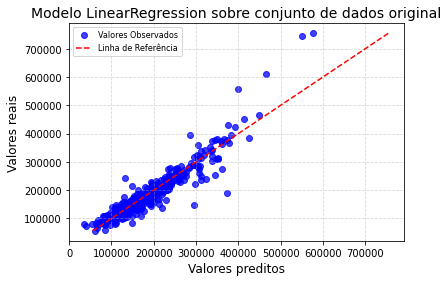

In [23]:
# Modelo de LinearRegression sobre dataset original
lr_model = LinearRegression()

# Treinando modelo
lr_model.fit(X_train, y_train)

# Predizendo valores
lr_pred = lr_model.predict(X_test)

# Imprimindo métricas
print('LinearRegression')
print(f'MSE: {mean_squared_error(y_test, lr_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, lr_pred):.2f}')
print(f'R2 {r2_score(y_test, lr_pred)*100:.2f}%')

# Gráfico de dispersão e linha de referencia
plt.scatter(x=lr_pred, y=y_test, color='blue', alpha=0.75, label='Valores Observados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')

# Inserindo informações no gráfico
plt.title('Modelo LinearRegression sobre conjunto de dados original', fontsize=14)
plt.xlabel('Valores preditos', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend(fontsize=8)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()


LinearRegression
MSE: 2968552392.79
MAE: 33689.12
R2 59.69%


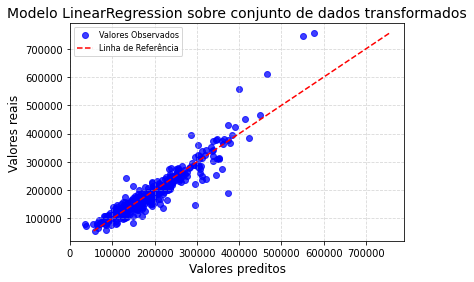

In [24]:
# Modelo de LinearRegression sobre dataset transformado
lr_model2 = LinearRegression()

# Treinando modelo
lr_model2.fit(X_pca_train, y_train)

# Predizendo valores
lr_pred2 = lr_model2.predict(X_pca_test)

# Imprimindo métricas
print('LinearRegression')
print(f'MSE: {mean_squared_error(y_test, lr_pred2):.2f}')
print(f'MAE: {mean_absolute_error(y_test, lr_pred2):.2f}')
print(f'R2 {r2_score(y_test, lr_pred2)*100:.2f}%')

# Gráfico de dispersão e linha de referencia
plt.scatter(x=lr_pred, y=y_test, color='blue', alpha=0.75, label='Valores Observados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')

# Inserindo informações no gráfico
plt.title('Modelo LinearRegression sobre conjunto de dados transformados', fontsize=14)
plt.xlabel('Valores preditos', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend(fontsize=8)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

RandomForestRegressor
MSE: 1001364947.53
MAE: 18820.10
R2 86.40%


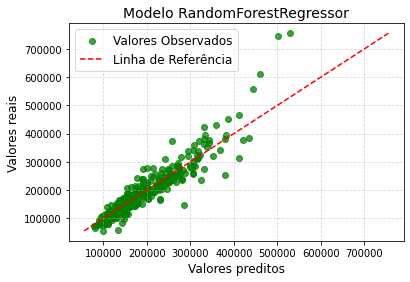

In [25]:
# Modelo de RandomForestRegressor sobre dataset padrão
rf_model = RandomForestRegressor(random_state=SEED)

# Treiando modelo
rf_model.fit(X_train, y_train)

# Predizendo valores
rf_pred = rf_model.predict(X_test)

# Imprimindo métricas
print('RandomForestRegressor')
print(f'MSE: {mean_squared_error(y_test, rf_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, rf_pred):.2f}')
print(f'R2 {r2_score(y_test, rf_pred)*100:.2f}%')

# Gráfico de dispersão e linha de referencia
plt.scatter(x=rf_pred, y=y_test, color='green', alpha=0.75, label='Valores Observados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')

# Informações do gráfico
plt.title('Modelo RandomForestRegressor', fontsize=14)
plt.xlabel('Valores preditos', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

RandomForestRegressor
MSE: 1503015041.79
MAE: 24327.92
R2 79.59%


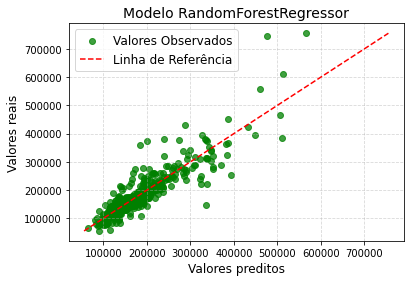

In [26]:
# Modelo de RandomForestRegressor sobre dataset transformado
rf_model = RandomForestRegressor(random_state=SEED)

# Treiando modelo
rf_model.fit(X_pca_train, y_train)

# Predizendo valores
rf_pred = rf_model.predict(X_pca_test)

# Imprimindo métricas
print('RandomForestRegressor')
print(f'MSE: {mean_squared_error(y_test, rf_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, rf_pred):.2f}')
print(f'R2 {r2_score(y_test, rf_pred)*100:.2f}%')

# Gráfico de dispersão e linha de referencia
plt.scatter(x=rf_pred, y=y_test, color='green', alpha=0.75, label='Valores Observados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')

# Informações do gráfico
plt.title('Modelo RandomForestRegressor', fontsize=14)
plt.xlabel('Valores preditos', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

GradientBoostingRegressor
MSE: 818281361.09
MAE: 17021.82
R2 88.89%


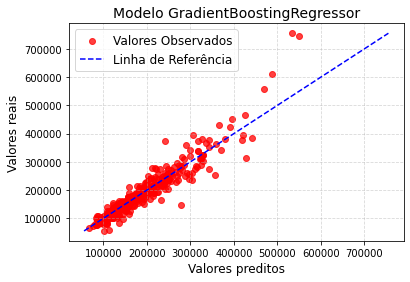

In [27]:
# Modelo GradientBoostingRegressor sobre dataset padrão
gb_model = GradientBoostingRegressor(random_state=SEED)

# Treinando modelo
gb_model.fit(X_train, y_train)

# Predizendo valores
gb_pred = gb_model.predict(X_test)

# Imprimindo métricas
print('GradientBoostingRegressor')
print(f'MSE: {mean_squared_error(y_test, gb_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, gb_pred):.2f}')
print(f'R2 {r2_score(y_test, gb_pred)*100:.2f}%')

# Gráfico de dispersão e linha de referência
plt.scatter(x=gb_pred, y=y_test, color='red', alpha=0.75, label='Valores Observados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Linha de Referência')

# Informações do gráfico
plt.title('Modelo GradientBoostingRegressor', fontsize=14)
plt.xlabel('Valores preditos', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

GradientBoostingRegressor
MSE: 1336457871.34
MAE: 23569.17
R2 81.85%


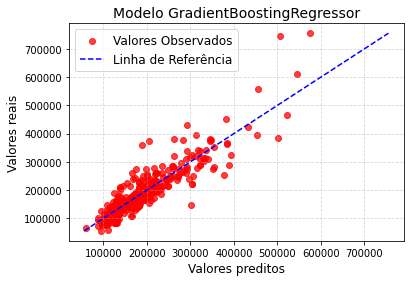

In [28]:
# Modelo GradientBoostingRegressor sobre dataset transformado
gb_model = GradientBoostingRegressor(random_state=SEED)

# Treinando modelo
gb_model.fit(X_pca_train, y_train)

# Predizendo valores
gb_pred = gb_model.predict(X_pca_test)

# Imprimindo métricas
print('GradientBoostingRegressor')
print(f'MSE: {mean_squared_error(y_test, gb_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, gb_pred):.2f}')
print(f'R2 {r2_score(y_test, gb_pred)*100:.2f}%')

# Gráfico de dispersão e linha de referência
plt.scatter(x=gb_pred, y=y_test, color='red', alpha=0.75, label='Valores Observados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Linha de Referência')

# Informações do gráfico
plt.title('Modelo GradientBoostingRegressor', fontsize=14)
plt.xlabel('Valores preditos', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

XGBRegressor
MSE: 895144083.76
MAE: 18579.37
R2 87.85%


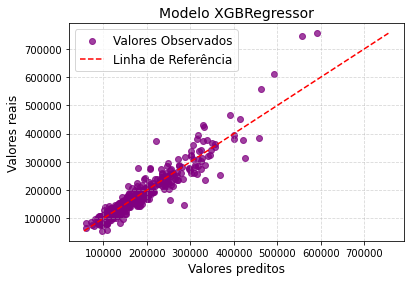

In [29]:
# Modelo XGBRegressor sobre dataset padrão
xgb_model = XGBRegressor(random_state=SEED)

# Treinando modelo
xgb_model.fit(X_train, y_train)

# Predizendo valores
xgb_pred = xgb_model.predict(X_test)

# Imprimindo métricas
print('XGBRegressor')
print(f'MSE: {mean_squared_error(y_test, xgb_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, xgb_pred):.2f}')
print(f'R2 {r2_score(y_test, xgb_pred)*100:.2f}%')

# Gráfico de dispersão e linha de referência
plt.scatter(x=xgb_pred, y=y_test, color='purple', alpha=0.75, label='Valores Observados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')

# Informações do gráfico
plt.title('Modelo XGBRegressor', fontsize=14)
plt.xlabel('Valores preditos', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

MSE: 1519364700.59
MAE: 25077.77
R2 79.37%


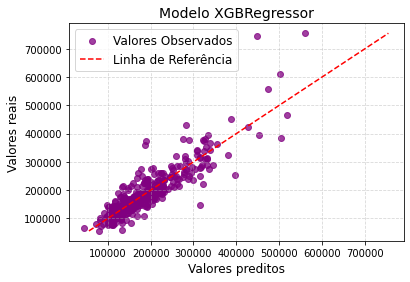

In [30]:
# Modelo XGBRegressor sobre dataset transformado
xgb_model = XGBRegressor(random_state=SEED)

# Treinando modelo
xgb_model.fit(X_pca_train, y_train)

# Predizendo valores
xgb_pred = xgb_model.predict(X_pca_test)

# Imprimindo métricas
print(f'MSE: {mean_squared_error(y_test, xgb_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, xgb_pred):.2f}')
print(f'R2 {r2_score(y_test, xgb_pred)*100:.2f}%')

# Gráfico de dispersão e linha de referência
plt.scatter(x=xgb_pred, y=y_test, color='purple', alpha=0.75, label='Valores Observados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')

# Informações do gráfico
plt.title('Modelo XGBRegressor', fontsize=14)
plt.xlabel('Valores preditos', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

O modelos *GradientBoostingRegressor* com os dados padrões foi o que melhor perfomou.  
MSE: 818281361.09  
MAE: 17021.82487517436  
R2 88.89%  

## Otimizando Modelo

GradientBoostingRegressor
MSE: 751232103.97
MAE: 16415.93
R2 89.80%


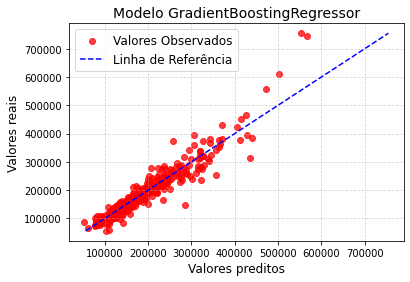

In [31]:
# Modelo GradientBoostingRegressor sobre dataset padrão
gb_model = GradientBoostingRegressor(
        n_estimators = 400,
        learning_rate =  0.1,
        max_depth= 3,
        min_samples_split = 4,
        min_samples_leaf = 2,
        random_state=SEED)

# Treinando modelo
gb_model.fit(X_train, y_train)

# Predizendo valores
gb_pred = gb_model.predict(X_test)

# Imprimindo métricas
print('GradientBoostingRegressor')
print(f'MSE: {mean_squared_error(y_test, gb_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, gb_pred):.2f}')
print(f'R2 {r2_score(y_test, gb_pred)*100:.2f}%')

# Gráfico de dispersão e linha de referência
plt.scatter(x=gb_pred, y=y_test, color='red', alpha=0.75, label='Valores Observados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Linha de Referência')

# Informações do gráfico
plt.title('Modelo GradientBoostingRegressor', fontsize=14)
plt.xlabel('Valores preditos', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

In [32]:
valid_pred = gb_model.predict(valid)


O modelo conseguiu explicar aproximadamente 89.80% da variabilidade nos preços das casas, com um erro médio absoluto de cerca de 16415.93 unidades monetárias e um erro quadrático médio de aproximadamente 751232103.97

In [33]:
# Aplicando modelo nos dados de validação
valid['Price'] = gb_model.predict(valid)

In [41]:
# Visualizando valores preditos
valid.iloc[:,-1:]

,Price
0,128289.279338
1,169422.306795
2,185572.422262
3,198060.484123
4,194920.587751
...,...
1454,81998.755263
1455,71779.921826
1456,159842.075573
1457,122600.504502
